In [9]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

FILE_PATH = "data.csv"

In [19]:
def read_data():
    # Read original CSV
    df_original = pd.read_csv(FILE_PATH)
    df_original['Date'] = pd.to_datetime(df_original['Date'])

    # Set 'Date' as index for interpolation
    df = df_original.set_index('Date')

    # Reindex to include all days between first and last date
    all_days = pd.date_range(start=df.index.min(), end=df.index.max())
    df = df.reindex(all_days)

    # Interpolate missing 'Weight' linearly
    df['Weight'] = df['Weight'].interpolate(method='linear')

    # Daily change from interpolated data
    df['DailyDelta'] = df['Weight'].diff()

    # EMA calculations on interpolated values
    df['EMA7'] = df['Weight'].ewm(span=7, adjust=False).mean()
    df['EMA30'] = df['Weight'].ewm(span=30, adjust=False).mean()

    # Reset index to make 'Date' a column again
    df = df.reset_index().rename(columns={'index': 'Date'})

    # Keep only original dates
    df_final = df[df['Date'].isin(df_original['Date'])].copy()

    # Days from first entry
    df_final['Days'] = (df_final['Date'] - df_final['Date'].iloc[0]).dt.days

    # Change from last original entry
    df_final['Delta'] = df_final['Weight'].diff()

    # Reorder columns as requested
    df_final = df_final[['Date', 'Days', 'Weight', 'Delta', 'DailyDelta', 'EMA7', 'EMA30']]

    return df_final

In [20]:
def plot_records():
    df = read_data()
    output_file="plot.png"

    # Ensure Date column is datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Create figure
    fig, ax1 = plt.subplots(figsize=(12, 6), dpi=300)

    # Plot Weight and EMAs
    ax1.plot(df['Date'], df['Weight'], label='Weight', marker='o')
    ax1.plot(df['Date'], df['EMA7'], label='EMA7', linestyle='--')
    ax1.plot(df['Date'], df['EMA30'], label='EMA30', linestyle='--')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Weight / EMA')
    ax1.legend(loc='upper left')
    ax1.grid(True)

    # Auto-format date labels
    fig.autofmt_xdate()

    # Save to file
    plt.tight_layout()
    plt.show()
    plt.close(fig)

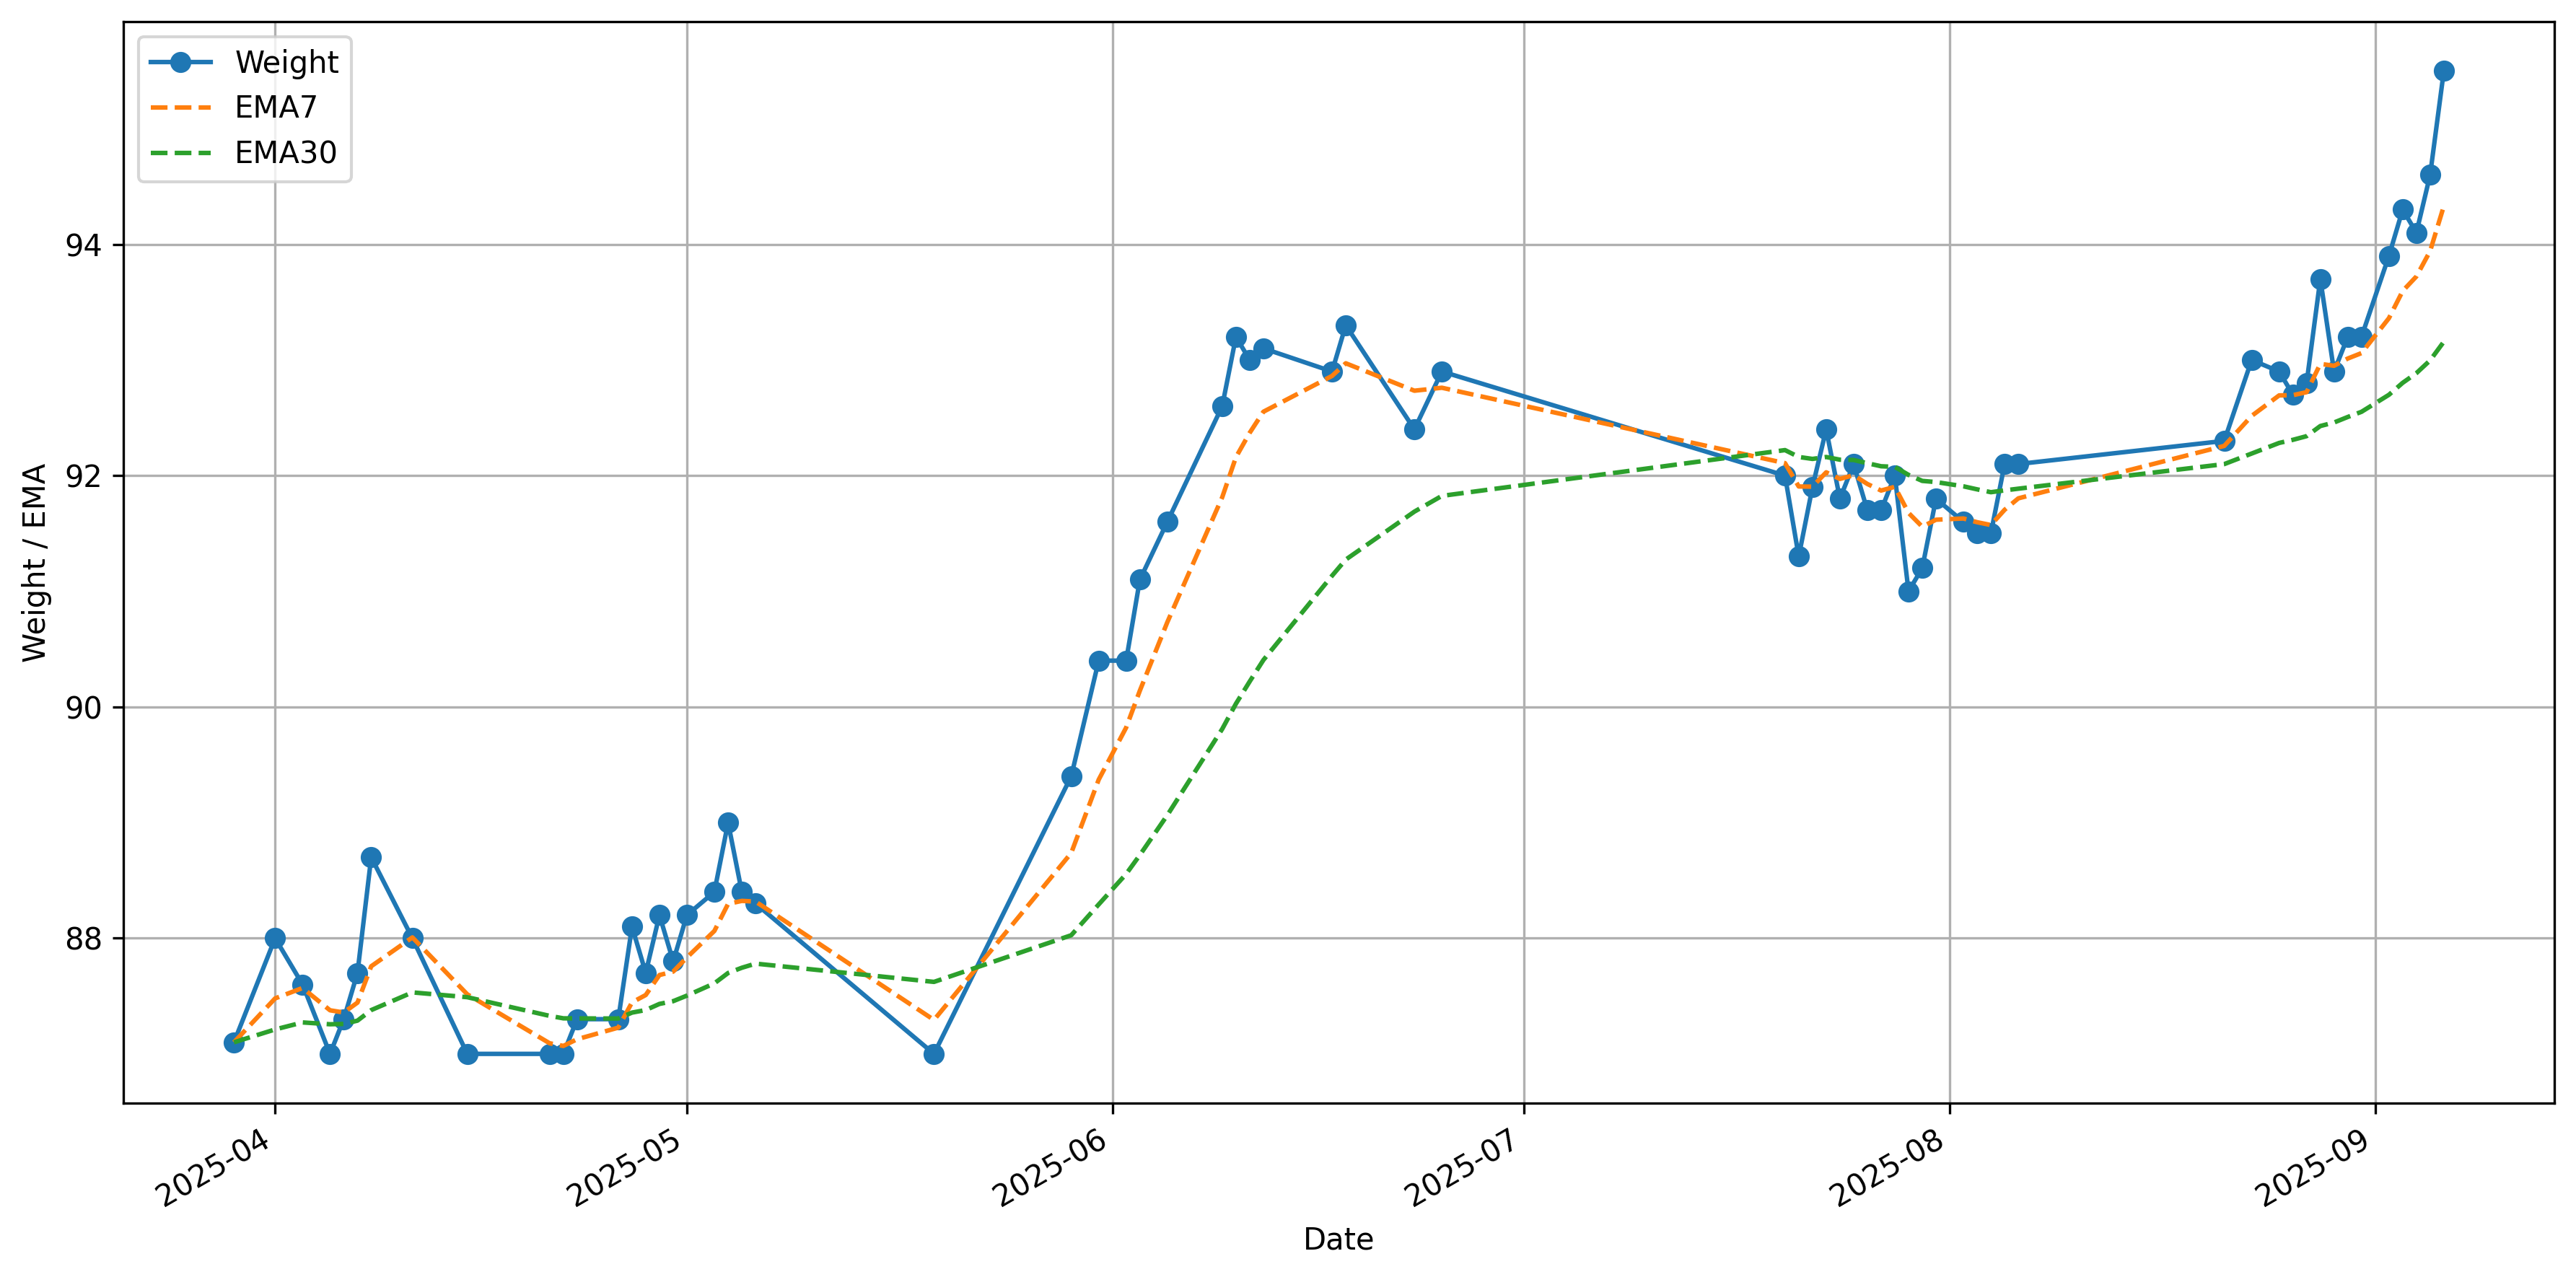

In [21]:
plot_records() 
